In [1]:
import sys
sys.path.append('../')
import mobipy
from mobipy import conc
import matplotlib.pyplot as plt

In [2]:
app = mobipy.Model_Application.build_from_model_and_data_file('models/simplyc_model.txt', 'models/simplyq_data.dat')
app.run()

RuntimeError: ERROR (parsing): In file models/simplyc_model.txt line 10 column 30:
The handle 'sc' was already declared in this scope. See declaration at: file simplyq_model.txt line 26 column 18:




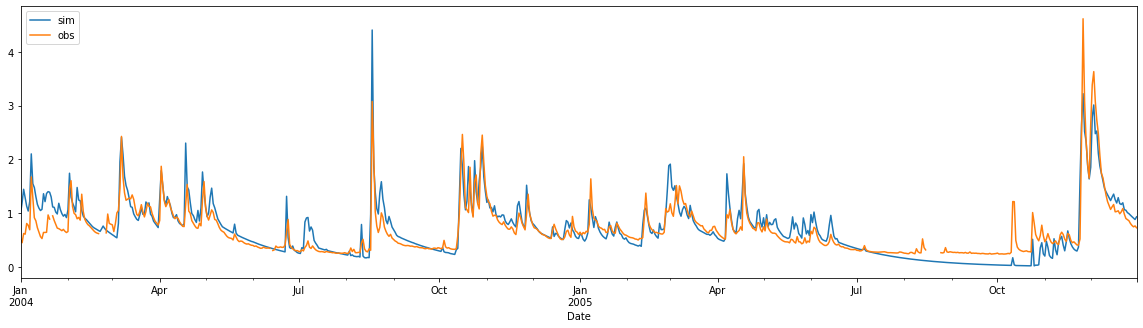

In [3]:
sim = app.rw.river.flow[["Coull"]]
obs = app.additional_series("observed Q")[[]]

obs = obs[sim.index]

fig,ax = plt.subplots(1,1)
fig.set_size_inches(20,5)

sim.plot(ax=ax, label='sim')
obs.plot(ax=ax, label='obs')
ax.legend()

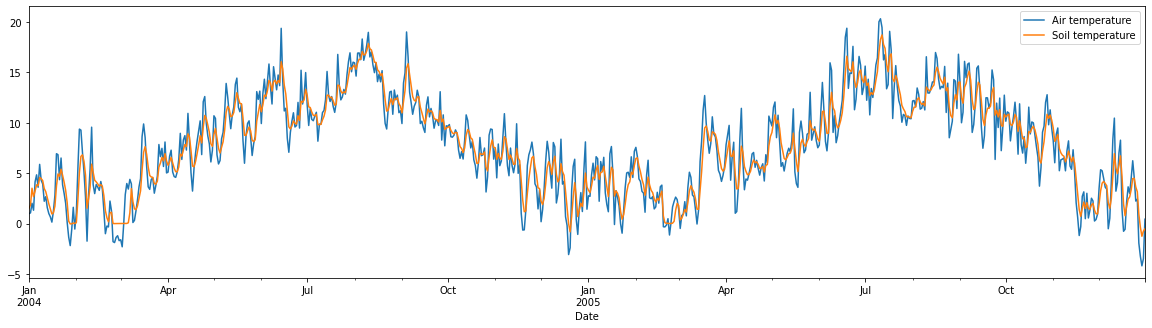

In [4]:
air_temp = app.sn.air.temp[[]]
soil_temp = app.st.soil.temp[['Arable']]

air_temp = air_temp[soil_temp.index]

fig,ax = plt.subplots(1,1)
fig.set_size_inches(20,5)

air_temp.plot(ax=ax)
soil_temp.plot(ax=ax)
ax.legend()

begin model run.
got past allocation
begin run
Run time: 5 milliseconds, 10792263 cycles.



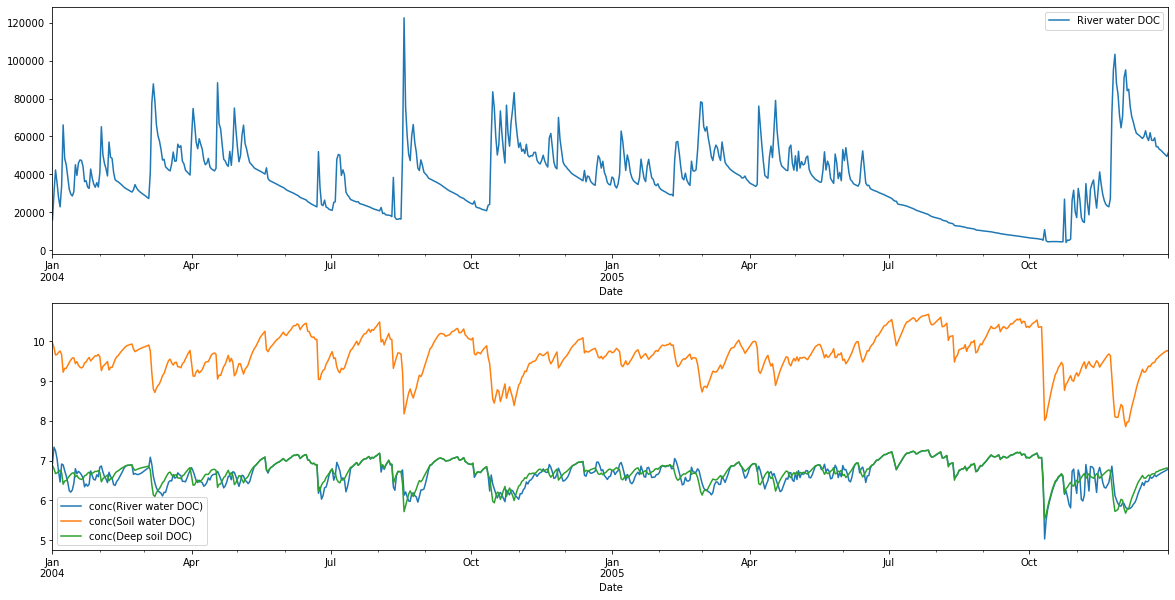

In [5]:

app.sc.gwdocconc[[]] = 5.3
app.run()

river_doc      = app.river.water.oc[["Coull"]]
river_doc_conc = conc(app.river.water.oc)[["Coull"]]
soil_doc_conc_a  = conc(app.soil.water.oc)[["Arable"]]
soil_doc_conc_i  = conc(app.soil.water.oc)[["Improved grasslands"]]
soil_doc_conc_s  = conc(app.soil.water.oc)[["Semi-natural"]]
gw_doc_conc    = conc(app.gw.water.oc)[["Coull"]]
#gw_doc_conc    = conc(app.gw.water.oc)[[]]

fig,ax = plt.subplots(2,1)
fig.set_size_inches(20,10)

river_doc.plot(ax=ax[0])
river_doc_conc.plot(ax=ax[1])
soil_doc_conc_a.plot(ax=ax[1])
#soil_doc_conc_i.plot(ax=ax[1])
#soil_doc_conc_s.plot(ax=ax[1])
gw_doc_conc.plot(ax=ax[1])

ax[0].legend()
ax[1].legend()

begin model run.
got past allocation
begin run
Run time: 8 milliseconds, 16124697 cycles.



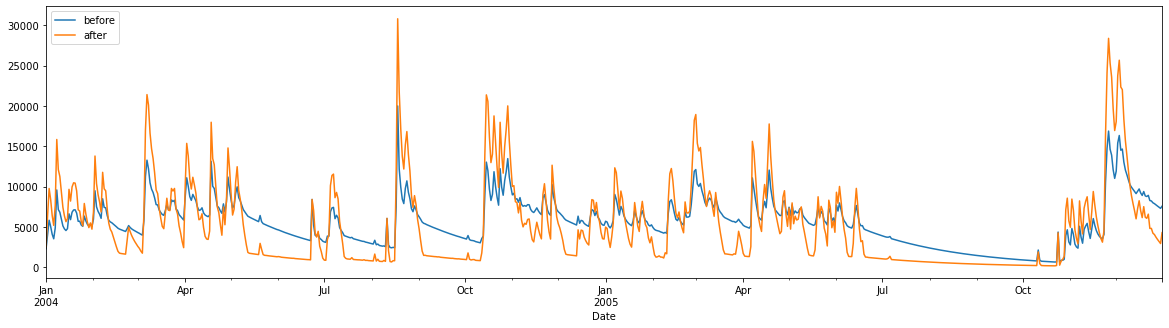

In [6]:
before = app.river.water[["Coull"]]     # Read the time series of river.water (volume)
app.sw.bfi[[]] = 0.1                    # Set base flow index to 0.1
app.sw.tc_s[['Arable']] = 5             # Set water time constant for Arable land class to 5
app.run()
after = app.river.water[["Coull"]]      # Read the time series again.

fig,ax = plt.subplots(1,1)
fig.set_size_inches(20,5)

before.plot(ax=ax, label='before')
after.plot(ax=ax, label='after')
ax.legend()

<AxesSubplot:xlabel='Date'>

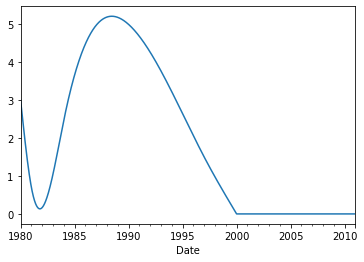

In [3]:
app.additional_series("Spline test")[[]].plot()

In [1]:
import sys
sys.path.append('../')
import mobipy
from mobipy import conc
import matplotlib.pyplot as plt

In [2]:
app = mobipy.Model_Application.build_from_model_and_data_file('models/simplyp_model.txt', 'models/simplyp_data.dat')
app.run()

compose begin
State var registration begin.
**** register Air temperature as series
**** register Precipitation as series
**** register Snow depth as state var
**** register Snow water as state var
**** register Soil water volume as state var
**** register Groundwater volume as state var
**** register Reach water volume as state var
**** register Potential evapotranspiration as state var
**** register Time dependent vegetation cover factor as state var
**** register Erosion factor land as state var
**** register Erosion factor river as state var
**** register EPC0 as state var
**** register Soil labile P mass as state var
**** register Soil water flow as state var
**** register Reach flow as state var
**** register Suspended sediments as state var
**** register Soil TDP mass as state var
**** register Labile P concentration as state var
**** register Groundwater TDP as state var
**** register River TDP as state var
**** register River PP as state var
**** register PP mobilization facto

Indexes are:  Coull 0



<AxesSubplot:xlabel='Date'>

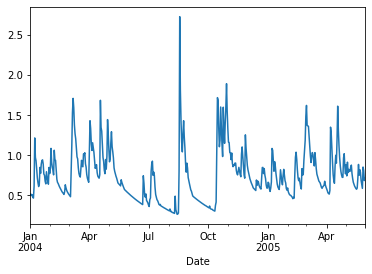

In [3]:
app.rw.river.water.flow[["Coull"]].plot()
#app.rw.river.flow[["Coull"]].plot()

Indexes are:  Coull 0

Indexes are:  Arable 0
 Semi-natural 2
 Improved grasslands 1



<AxesSubplot:xlabel='Date'>

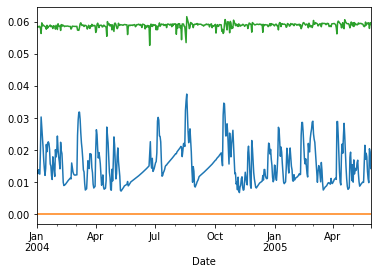

In [5]:
(conc(app.river.water.tdp)[["Coull"]]*1000).plot()
conc(app.gw.water.tdp)[[]].plot()
conc(app.soil.water.tdp)[["Arable"]].plot()

<AxesSubplot:xlabel='Date'>

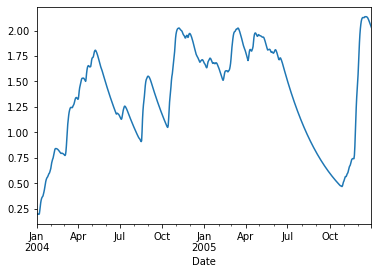

In [5]:
app.gw.water.tdp[["Coull"]].plot()

<AxesSubplot:xlabel='Date'>

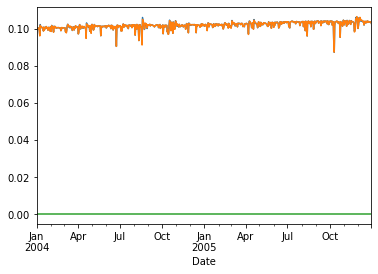

In [6]:
#app.soil.plab[["Arable"]].plot()
conc(app.soil.water.tdp)[["Arable"]].plot()
conc(app.soil.water.tdp)[["Improved grasslands"]].plot()
conc(app.soil.water.tdp)[["Semi-natural"]].plot()

<AxesSubplot:xlabel='Date'>

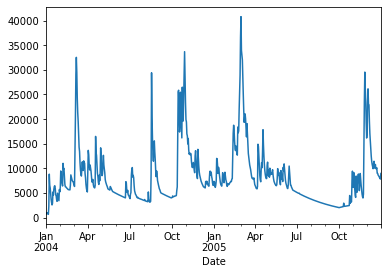

In [3]:
conc(app.river.water.pp)[["Coull"]].plot()